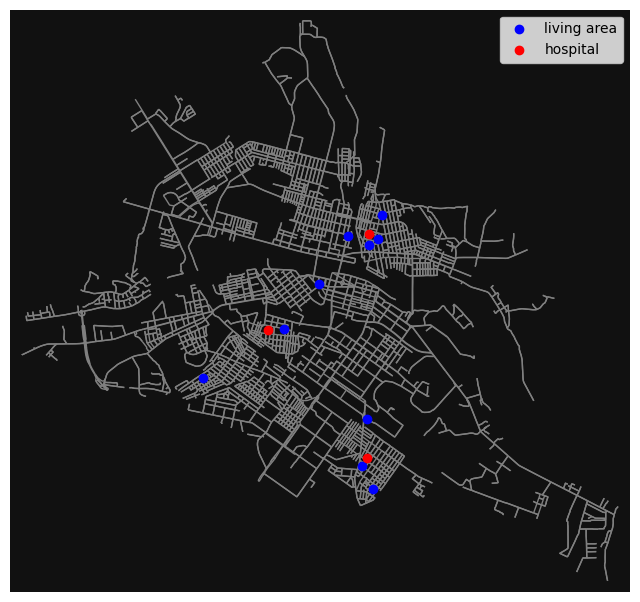

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


place_name = "Tver, Russia"
graph = ox.graph_from_place(place_name, network_type='drive')


nodes, edges = ox.graph_to_gdfs(graph)


np.random.seed(42)
num_residential_areas = 10
residential_points = nodes.sample(num_residential_areas)


X = np.array([[point.y, point.x] for point in residential_points.geometry])


num_clinics = 3
kmeans = KMeans(n_clusters=num_clinics, random_state=42)
kmeans.fit(X)


clinic_locations = kmeans.cluster_centers_


fig, ax = ox.plot_graph(graph, show=False, close=False, edge_color='gray', node_size=0)


ax.scatter(residential_points.geometry.x, residential_points.geometry.y, c='blue', label='living area')


ax.scatter(clinic_locations[:, 1], clinic_locations[:, 0], c='red', label='hospital')

plt.legend()
plt.show()